<a href="https://colab.research.google.com/github/vyasaastik/Air_Quality_Index_Predictor/blob/main/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
### Install Required Libraries

!pip install pandas matplotlib seaborn scikit-learn

In [6]:
### Load the Dataset

import zipfile
import os

# Path
zip_path = '/content/archive (5).zip'
extract_path = '/content/extracted_data'

os.makedirs(extract_path, exist_ok=True)

# Extract all contents
with zipfile.ZipFile(zip_path,'r')as zip_ref:
  zip_ref.extractall(extract_path)

# List extracted Files
print('Extracted Files:',os.listdir(extract_path))

Extracted Files: ['city_day.csv', 'station_hour.csv', 'city_hour.csv', 'station_day.csv', 'stations.csv']


In [8]:
## City_data

from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day (2).csv


In [9]:
## Load and preview data

import pandas as pd

# Load
df = pd.read_csv('/content/city_day.csv')

# First 5 rows
print(df.head())

# Basic Info
print(df.info())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

In [10]:
### Data Cleaning

# Missing Values
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [11]:
## Convert Date to datetime format

df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values(by='Date')

In [12]:
## Fill missing values

df_cleaned = df.fillna(df.mean(numeric_only=True))
print(df_cleaned.isnull().sum())

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


In [13]:
### EDA(Exploratory Data Analysis)

print(df.describe())

## describe() shows min ,max, mean, standard deviation

                                Date         PM2.5          PM10  \
count                          29531  24933.000000  18391.000000   
mean   2018-05-14 05:40:15.807118080     67.450578    118.127103   
min              2015-01-01 00:00:00      0.040000      0.010000   
25%              2017-04-16 00:00:00     28.820000     56.255000   
50%              2018-08-05 00:00:00     48.570000     95.680000   
75%              2019-09-03 00:00:00     80.590000    149.745000   
max              2020-07-01 00:00:00    949.990000   1000.000000   
std                              NaN     64.661449     90.605110   

                 NO           NO2           NOx           NH3            CO  \
count  25949.000000  25946.000000  25346.000000  19203.000000  27472.000000   
mean      17.574730     28.560659     32.309123     23.483476      2.248598   
min        0.020000      0.010000      0.000000      0.010000      0.000000   
25%        5.630000     11.750000     12.820000      8.580000      0.51

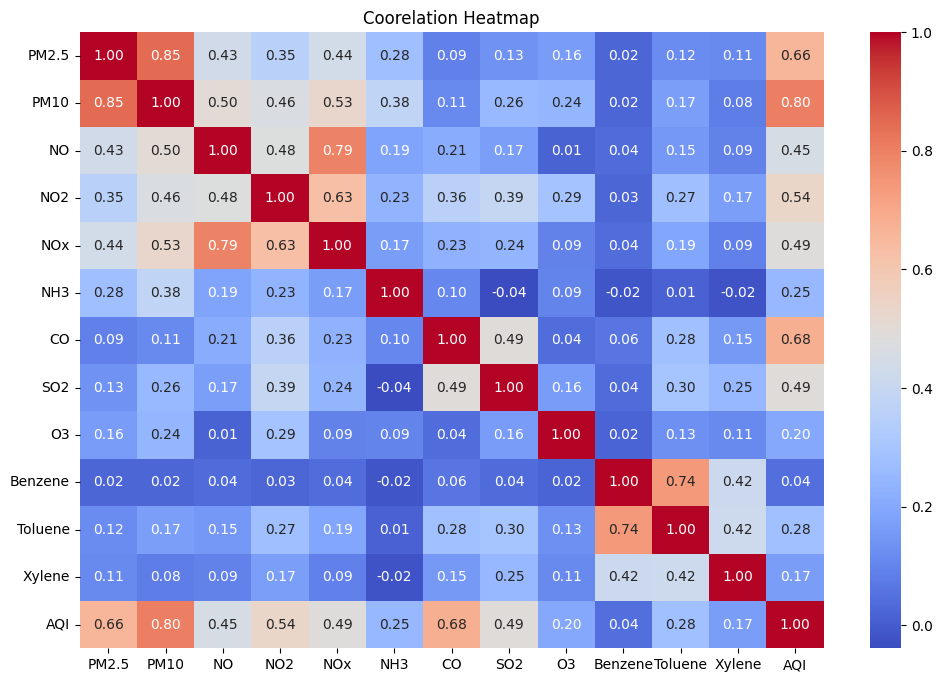

In [14]:
### Check Coorelations

import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm' ,fmt='.2f')
plt.title('Coorelation Heatmap')
plt.show()

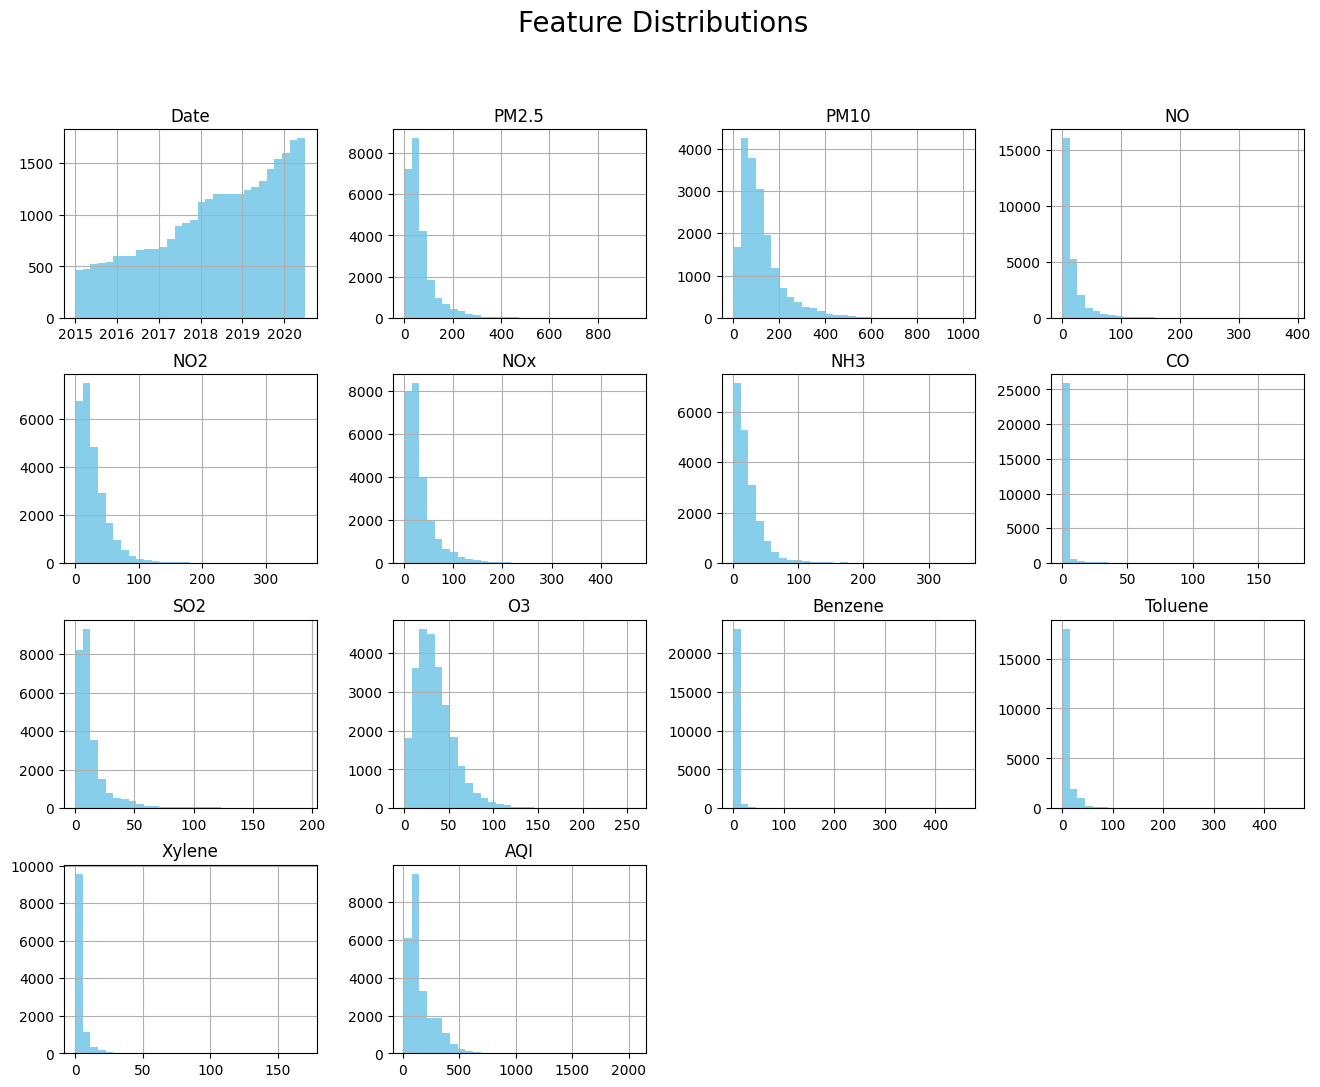

In [15]:
### Visualize distributions of pollutants

df.hist(bins=30,figsize=(16,12),color='skyblue')
plt.suptitle('Feature Distributions',fontsize=20)
plt.show()

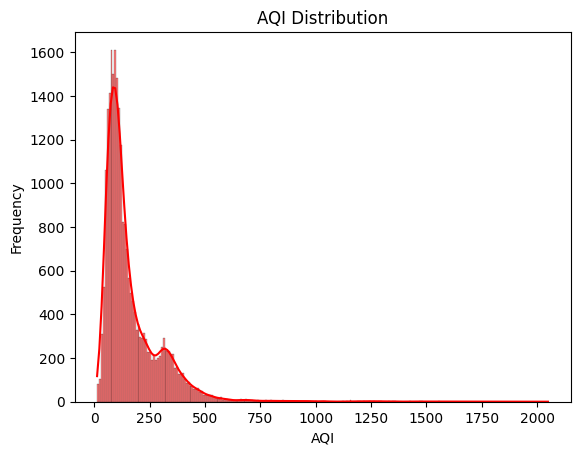

In [16]:
### Check AQI distribution

sns.histplot(df['AQI'],kde=True,color='red')
plt.title('AQI Distribution')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

In [17]:
### Pre-Processing

### Drop Unnecessary columns

data = df.drop(columns=['City','Date','AQI_Bucket'])

# Drop rows with NAN Values
data = data.dropna(subset=['AQI'])

In [18]:
### Feature and Target Split

X = data.drop(columns=['AQI']) # Features
y = data['AQI']

In [19]:
### Train-Test Split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X,y,test_size=0.2,random_state=42)

In [20]:
### Model Training

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [21]:
### Predictions
y_pred = model.predict(X_test)

In [22]:
### Evaluation

from sklearn.metrics import mean_squared_error , r2_score

print('MSE:',mean_squared_error(y_test,y_pred))
print('r2_score:', r2_score(y_test,y_pred))

MSE: 2343.020859425308
r2_score: 0.8814405817273231


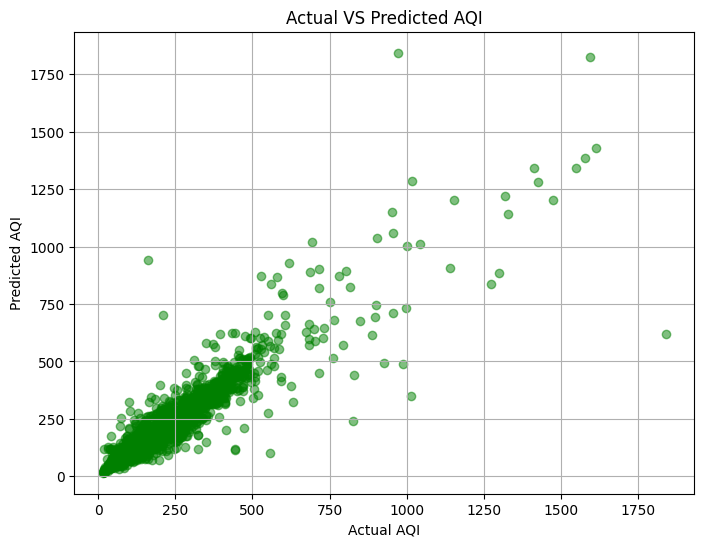

In [23]:
### Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test ,y_pred, alpha=0.5,color='green')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual VS Predicted AQI')
plt.grid(True)
plt.show()

    Feature  Importance
0     PM2.5    0.488188
6        CO    0.366307
1      PM10    0.046712
2        NO    0.034078
8        O3    0.013619
4       NOx    0.013039
7       SO2    0.009292
3       NO2    0.007935
10  Toluene    0.006423
9   Benzene    0.005736
11   Xylene    0.004903
5       NH3    0.003768


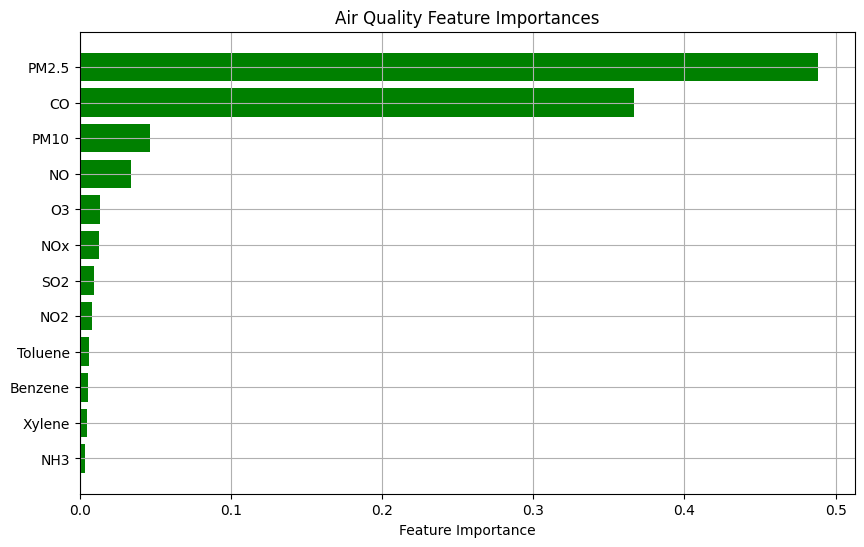

In [24]:
### Feature Importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe for easy sorting
feat_imp = pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

# Display
print(feat_imp)

#Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'],feat_imp['Importance'],color='green')
plt.xlabel('Feature Importance')
plt.title('Air Quality Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [42]:
### Save the Model

import joblib

# Save the Model to a file
joblib.dump(model,'aqi_predictor_model.pkl')

print("Model saved as 'aqi_predictor_model.pkl'")

Model saved as 'aqi_predictor_model.pkl'


In [43]:
### Load Model anytime

# Load the model

# loaded_model = joblib.load('aqi_predictor_model.pkl')

# Predict again
# new_prediction = loaded_model.predict(X_test)

In [54]:
!pip install --upgrade gradio


In [ ]:
import gradio as gr
import pandas as pd
import joblib
import numpy as np

# Load the model with verification
try:
    model = joblib.load('aqi_predictor_model.pkl')
    print("Model loaded successfully!")

    # Get the exact feature order from the model
    if hasattr(model, 'feature_names_in_'):
        FEATURE_ORDER = list(model.feature_names_in_)
        print("Model expects features in this order:", FEATURE_ORDER)
    else:
        # Fallback to the order from your original code
        FEATURE_ORDER = ['PM2.5', 'CO', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
        print("Using default feature order")

except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Default values based on typical air quality data
DEFAULT_VALUES = {
    'PM2.5': 45.0,
    'CO': 1.2,
    'PM10': 80.0,
    'NO': 10.0,
    'NO2': 25.0,
    'NOx': 35.0,
    'NH3': 15.0,
    'SO2': 30.0,
    'O3': 50.0,
    'Benzene': 5.0,
    'Toluene': 10.0,
    'Xylene': 5.0
}

def predict_aqi(PM2_5, PM10, NO, CO):
    try:
        # Create input dictionary with all features
        input_data = DEFAULT_VALUES.copy()

        # Update with user-provided values
        input_data.update({
            'PM2.5': float(PM2_5),
            'PM10': float(PM10),
            'NO': float(NO),
            'CO': float(CO)
        })

        # Create DataFrame with EXACTLY the same column order as during training
        input_df = pd.DataFrame([input_data])[FEATURE_ORDER]

        # Debug output
        print("\nInput data:")
        print(input_df)
        print("Column order:", input_df.columns.tolist())

        # Make prediction
        prediction = model.predict(input_df)[0]
        print("Predicted AQI:", prediction)

        return format_aqi_output(prediction, input_data)

    except Exception as e:
        error_msg = f"""
        <div style='background-color: #ffebee; padding: 20px; border-radius: 10px; color: #b71c1c;'>
            <h3>⚠️ Prediction Error</h3>
            <p>{str(e)}</p>
            <p><small>Check console for detailed error logs</small></p>
        </div>
        """
        print(f"Prediction error: {e}")
        return error_msg

def format_aqi_output(aqi, inputs):
    """Format the AQI prediction with color coding"""
    if aqi <= 50:
        category, color = "Good 🌿", "#00E400"
    elif aqi <= 100:
        category, color = "Moderate 🌤️", "#FFFF00"
    elif aqi <= 150:
        category, color = "Unhealthy for Sensitive Groups 😷", "#FF7E00"
    elif aqi <= 200:
        category, color = "Unhealthy ❗", "#FF0000"
    elif aqi <= 300:
        category, color = "Very Unhealthy ‼️", "#8F3F97"
    else:
        category, color = "Hazardous ☠️", "#7E0023"

    return f"""
    <div style='background-color: {color}; padding: 20px; border-radius: 10px; color: white;'>
        <h1 style='text-align: center; margin-top: 0;'>AQI: {aqi:.0f}</h1>
        <h2 style='text-align: center;'>{category}</h2>

        <div style='background-color: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px;'>
            <h3>Key Pollutants</h3>
            <p>PM2.5: {inputs['PM2.5']} µg/m³ | PM10: {inputs['PM10']} µg/m³</p>
            <p>NO: {inputs['NO']} µg/m³ | CO: {inputs['CO']} mg/m³</p>
        </div>
    </div>
    """

# Create the Gradio interface
with gr.Blocks(theme=gr.themes.Soft()) as app:
    gr.Markdown("# 🌍 Air Quality Index Predictor")
    gr.Markdown("Using the top 4 most important features with smart defaults for others")

    with gr.Row():
        with gr.Column():
            gr.Markdown("### Enter Pollutant Levels")
            pm25 = gr.Slider(0, 500, value=DEFAULT_VALUES['PM2.5'], label="PM2.5 (µg/m³)")
            pm10 = gr.Slider(0, 500, value=DEFAULT_VALUES['PM10'], label="PM10 (µg/m³)")
            no = gr.Slider(0, 100, value=DEFAULT_VALUES['NO'], label="NO (µg/m³)")
            co = gr.Slider(0, 10, value=DEFAULT_VALUES['CO'], step=0.1, label="CO (mg/m³)")
            btn = gr.Button("Predict AQI", variant="primary")

        with gr.Column():
            gr.Markdown("### AQI Prediction")
            output = gr.HTML()

    # Debug info (collapsed by default)
    with gr.Accordion("Debug Information", open=False):
        gr.Markdown(f"""
        **Model Feature Order:**
        {", ".join(FEATURE_ORDER)}

        **Default Values Used for Other Features:**
        - NO2: {DEFAULT_VALUES['NO2']} µg/m³
        - NOx: {DEFAULT_VALUES['NOx']} µg/m³
        - NH3: {DEFAULT_VALUES['NH3']} µg/m³
        - SO2: {DEFAULT_VALUES['SO2']} µg/m³
        - O3: {DEFAULT_VALUES['O3']} µg/m³
        - Benzene: {DEFAULT_VALUES['Benzene']} µg/m³
        - Toluene: {DEFAULT_VALUES['Toluene']} µg/m³
        - Xylene: {DEFAULT_VALUES['Xylene']} µg/m³
        """)

    btn.click(
        fn=predict_aqi,
        inputs=[pm25, pm10, no, co],
        outputs=output
    )

# Launch with debugging
app.launch(debug=True)

Model loaded successfully!
Model expects features in this order: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://43b26a10fa57fe3264.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



Input data:
   PM2.5  PM10    NO   NO2   NOx   NH3   CO   SO2    O3  Benzene  Toluene  \
0   45.0  80.0  10.0  25.0  35.0  15.0  1.2  30.0  50.0      5.0     10.0   

   Xylene  
0     5.0  
Column order: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
Predicted AQI: 111.29

Input data:
   PM2.5  PM10    NO   NO2   NOx   NH3   CO   SO2    O3  Benzene  Toluene  \
0   45.0  80.0  10.0  25.0  35.0  15.0  1.2  30.0  50.0      5.0     10.0   

   Xylene  
0     5.0  
Column order: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
Predicted AQI: 111.29

Input data:
   PM2.5  PM10    NO   NO2   NOx   NH3   CO   SO2    O3  Benzene  Toluene  \
0  286.0  80.0  10.0  25.0  35.0  15.0  1.2  30.0  50.0      5.0     10.0   

   Xylene  
0     5.0  
Column order: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
Predicted AQI: 382.61

Input data:
   PM2.5  PM10 